In [1]:
from keras.datasets import mnist
from keras.utils import np_utils, to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Activation
from keras.optimizers import SGD
from keras.utils.data_utils import random
from google.colab.patches import cv2_imshow    
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()
img_rows=x_train[0].shape[0]
img_cols=x_train[1].shape[1]
x_train=x_train.reshape(len(x_train),img_rows,img_cols,1)
x_test=x_test.reshape(len(x_test),img_rows,img_cols,1)
x_train=x_train.astype("float32")
x_test=x_test.astype("float32")
x_train /= 255
x_test /= 255
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)
          
     

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
model = Sequential()
model.add(Conv2D(32,(3,3),input_shape= x_train.shape[1:]))
model.add(Activation("relu"))
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128,(3,3)))
model.add(Activation("relu"))
model.add(Conv2D(64,(3,3), activation="relu"))
model.add(Flatten())
model.add(Dense(256)) 
model.add(Dropout(0.25))
model.add(Dense(128))
model.add(Dropout(0.3))
model.add(Dense(y_train.shape[1], activation="softmax")) 
model.compile(loss = 'categorical_crossentropy', optimizer="Adam", metrics=["accuracy"])

Epoch 1/10
1875/1875 [==============================] - 326s 173ms/step - loss: 0.1187 - accuracy: 0.9640 - val_loss: 0.0513 - val_accuracy: 0.9824
Epoch 2/10
1875/1875 [==============================] - 313s 167ms/step - loss: 0.0499 - accuracy: 0.9851 - val_loss: 0.0468 - val_accuracy: 0.9854
Epoch 3/10
1875/1875 [==============================] - 312s 167ms/step - loss: 0.0397 - accuracy: 0.9880 - val_loss: 0.0403 - val_accuracy: 0.9894
Epoch 4/10
1875/1875 [==============================] - 326s 174ms/step - loss: 0.0328 - accuracy: 0.9904 - val_loss: 0.0372 - val_accuracy: 0.9887
Epoch 5/10
1875/1875 [==============================] - 312s 166ms/step - loss: 0.0280 - accuracy: 0.9915 - val_loss: 0.0410 - val_accuracy: 0.9900
Epoch 6/10
1875/1875 [==============================] - 313s 167ms/step - loss: 0.0256 - accuracy: 0.9923 - val_loss: 0.0318 - val_accuracy: 0.9919
Epoch 7/10
1875/1875 [==============================] - 315s 168ms/step - loss: 0.0208 - accuracy: 0.9941 - val_

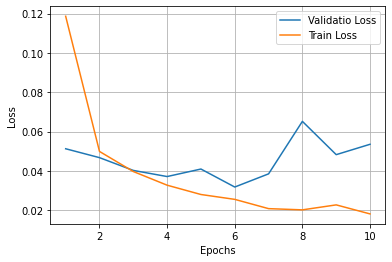

Epoch 1/10
938/938 [==============================] - 330s 351ms/step - loss: 0.0074 - accuracy: 0.9978 - val_loss: 0.0386 - val_accuracy: 0.9922
Epoch 2/10
938/938 [==============================] - 329s 351ms/step - loss: 0.0068 - accuracy: 0.9980 - val_loss: 0.0516 - val_accuracy: 0.9908
Epoch 3/10
938/938 [==============================] - 326s 348ms/step - loss: 0.0102 - accuracy: 0.9973 - val_loss: 0.0758 - val_accuracy: 0.9892
Epoch 4/10
938/938 [==============================] - 301s 321ms/step - loss: 0.0107 - accuracy: 0.9970 - val_loss: 0.0552 - val_accuracy: 0.9919
Epoch 5/10
938/938 [==============================] - 298s 317ms/step - loss: 0.0125 - accuracy: 0.9967 - val_loss: 0.0543 - val_accuracy: 0.9904
Epoch 6/10
938/938 [==============================] - 297s 316ms/step - loss: 0.0102 - accuracy: 0.9973 - val_loss: 0.0615 - val_accuracy: 0.9908
Epoch 7/10
938/938 [==============================] - 291s 310ms/step - loss: 0.0101 - accuracy: 0.9974 - val_loss: 0.0607 -

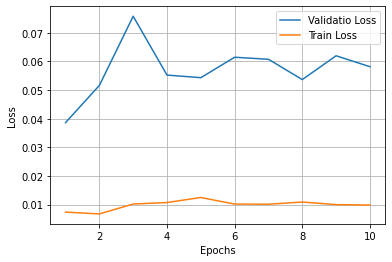

Epoch 1/10
469/469 [==============================] - 286s 609ms/step - loss: 0.0024 - accuracy: 0.9992 - val_loss: 0.0560 - val_accuracy: 0.9925
Epoch 2/10
469/469 [==============================] - 293s 624ms/step - loss: 0.0017 - accuracy: 0.9996 - val_loss: 0.0473 - val_accuracy: 0.9931
Epoch 3/10
469/469 [==============================] - 292s 622ms/step - loss: 0.0014 - accuracy: 0.9995 - val_loss: 0.0459 - val_accuracy: 0.9933
Epoch 4/10
469/469 [==============================] - 293s 625ms/step - loss: 0.0014 - accuracy: 0.9995 - val_loss: 0.0615 - val_accuracy: 0.9929
Epoch 5/10
469/469 [==============================] - 290s 618ms/step - loss: 0.0087 - accuracy: 0.9980 - val_loss: 0.0784 - val_accuracy: 0.9908
Epoch 6/10
469/469 [==============================] - 291s 620ms/step - loss: 0.0068 - accuracy: 0.9986 - val_loss: 0.0777 - val_accuracy: 0.9913
Epoch 7/10
469/469 [==============================] - 293s 625ms/step - loss: 0.0087 - accuracy: 0.9983 - val_loss: 0.0909 -

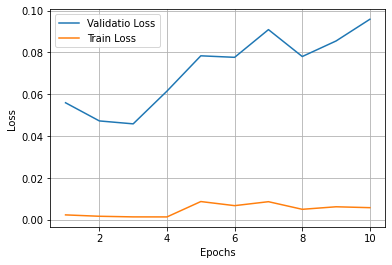

Epoch 1/10
235/235 [==============================] - 284s 1s/step - loss: 0.0023 - accuracy: 0.9993 - val_loss: 0.0698 - val_accuracy: 0.9930
Epoch 2/10
235/235 [==============================] - 277s 1s/step - loss: 9.8416e-04 - accuracy: 0.9997 - val_loss: 0.0693 - val_accuracy: 0.9930
Epoch 3/10
235/235 [==============================] - 273s 1s/step - loss: 0.0014 - accuracy: 0.9997 - val_loss: 0.0645 - val_accuracy: 0.9931
Epoch 4/10
235/235 [==============================] - 275s 1s/step - loss: 1.0609e-04 - accuracy: 1.0000 - val_loss: 0.0665 - val_accuracy: 0.9925
Epoch 5/10
235/235 [==============================] - 273s 1s/step - loss: 2.1883e-04 - accuracy: 0.9999 - val_loss: 0.0639 - val_accuracy: 0.9926
Epoch 6/10
235/235 [==============================] - 272s 1s/step - loss: 7.9551e-05 - accuracy: 1.0000 - val_loss: 0.0647 - val_accuracy: 0.9929
Epoch 7/10
235/235 [==============================] - 275s 1s/step - loss: 3.1299e-05 - accuracy: 1.0000 - val_loss: 0.0664 - 

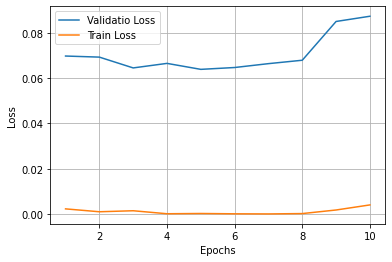

Epoch 1/10
118/118 [==============================] - 270s 2s/step - loss: 0.0022 - accuracy: 0.9994 - val_loss: 0.0827 - val_accuracy: 0.9930
Epoch 2/10
118/118 [==============================] - 275s 2s/step - loss: 8.9776e-04 - accuracy: 0.9999 - val_loss: 0.0806 - val_accuracy: 0.9924
Epoch 3/10
118/118 [==============================] - 275s 2s/step - loss: 5.1794e-04 - accuracy: 0.9999 - val_loss: 0.0736 - val_accuracy: 0.9931
Epoch 4/10
118/118 [==============================] - 273s 2s/step - loss: 2.8770e-04 - accuracy: 0.9999 - val_loss: 0.0796 - val_accuracy: 0.9927
Epoch 5/10
118/118 [==============================] - 275s 2s/step - loss: 9.6566e-05 - accuracy: 1.0000 - val_loss: 0.0787 - val_accuracy: 0.9920
Epoch 6/10
118/118 [==============================] - 276s 2s/step - loss: 2.6982e-05 - accuracy: 1.0000 - val_loss: 0.0771 - val_accuracy: 0.9923
Epoch 7/10
118/118 [==============================] - 274s 2s/step - loss: 1.5363e-04 - accuracy: 0.9999 - val_loss: 0.080

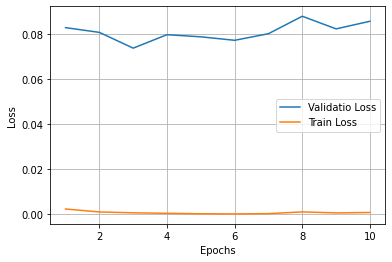

Epoch 1/10
59/59 [==============================] - 266s 5s/step - loss: 1.6066e-04 - accuracy: 0.9999 - val_loss: 0.0835 - val_accuracy: 0.9923
Epoch 2/10
59/59 [==============================] - 263s 4s/step - loss: 1.4229e-04 - accuracy: 0.9999 - val_loss: 0.0887 - val_accuracy: 0.9928
Epoch 3/10
59/59 [==============================] - 261s 4s/step - loss: 7.0501e-05 - accuracy: 1.0000 - val_loss: 0.0880 - val_accuracy: 0.9920
Epoch 4/10
59/59 [==============================] - 267s 5s/step - loss: 1.2949e-04 - accuracy: 0.9999 - val_loss: 0.0881 - val_accuracy: 0.9925
Epoch 5/10
59/59 [==============================] - 267s 5s/step - loss: 8.6605e-05 - accuracy: 1.0000 - val_loss: 0.0830 - val_accuracy: 0.9931
Epoch 6/10
59/59 [==============================] - 273s 5s/step - loss: 2.8910e-05 - accuracy: 1.0000 - val_loss: 0.0845 - val_accuracy: 0.9932
Epoch 7/10
59/59 [==============================] - 277s 5s/step - loss: 2.4525e-04 - accuracy: 0.9999 - val_loss: 0.0824 - val_ac

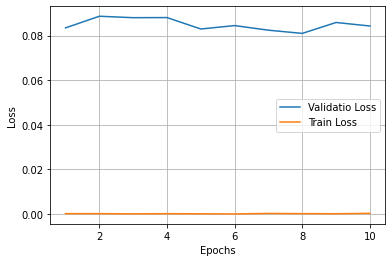

In [4]:
a = [1,2,3,4,5,6]
batch_size = [32,64,128,256,512,1024]

for i in range(6):
    a[i] = model.fit(x_train, y_train, batch_size=batch_size[i],epochs=10,validation_data=(x_test, y_test))
    score = model.evaluate(x_test, y_test)
    print(score[0])
    print(score[1])
    ad = a[i].history
    loss_values = ad["loss"]
    val_loss_values = ad["val_loss"]
    epochs = range(1,len(val_loss_values)+1)
    line1 = plt.plot(epochs,val_loss_values,label="Validatio Loss")
    line2 = plt.plot(epochs,loss_values,label="Train Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.grid(True)
    plt.legend()
    plt.show()
     